Question to work around: How do infrastructure projects like light rail, public transit, and schools influence housing, home prices, and the population in surrounding areas?

## Case Study: King County

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

In [5]:
# Set global figure size
plt.rcParams['figure.figsize'] = [10, 6]

# Set font sizes
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

plt.rcParams['figure.autolayout'] = True

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

import plotly.io as pio

pio.templates.default = "plotly_white"

plt.rcParams['text.usetex'] = True

# Color palettes

custom_palette = sns.color_palette('Set2')
sns.set_palette(custom_palette)

from cycler import cycler

# Define a custom color cycle
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

# Fonts
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [6]:
housing_data = pd.read_csv("datasets/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
print("Housing Data Loaded")
housing_data.sample(n=5)

Housing Data Loaded


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31
10039,810997,11096,Glen Mar,neighborhood,CA,CA,Huntington Beach,"Los Angeles-Long Beach-Anaheim, CA",Orange County,245130.074790,...,1.240497e+06,1.251320e+06,1.265381e+06,1.274210e+06,1.281679e+06,1.289558e+06,1.297956e+06,1.305241e+06,1.313572e+06,1.322746e+06
14094,762246,16237,Londonberry,neighborhood,MN,MN,Edina,"Minneapolis-St. Paul-Bloomington, MN-WI",Hennepin County,72283.382342,...,1.765124e+05,1.752578e+05,1.740241e+05,1.738509e+05,1.743157e+05,1.742284e+05,1.729048e+05,1.720466e+05,1.714266e+05,1.704260e+05
9779,126258,10772,Spring Glen,neighborhood,FL,FL,Jacksonville,"Jacksonville, FL",Duval County,61720.600348,...,2.209877e+05,2.244477e+05,2.253002e+05,2.239678e+05,2.210760e+05,2.183990e+05,2.160253e+05,2.142436e+05,2.131350e+05,2.133090e+05
20079,417764,24065,Superstition Ranch,neighborhood,AZ,AZ,Chandler,"Phoenix-Mesa-Chandler, AZ",Maricopa County,NaN,...,5.419056e+05,5.445940e+05,5.463693e+05,5.466489e+05,5.461527e+05,5.449039e+05,5.438206e+05,5.429953e+05,5.425702e+05,5.418485e+05
6442,272090,6809,Enderis Park,neighborhood,WI,WI,Milwaukee,"Milwaukee-Waukesha, WI",Milwaukee County,96353.493383,...,2.700044e+05,2.724862e+05,2.750208e+05,2.770952e+05,2.787833e+05,2.801401e+05,2.814508e+05,2.826876e+05,2.839970e+05,2.854345e+05


In [7]:
schools_geo = gpd.read_file("datasets/School_Sites_in_King_County___schsite_point.geojson")
print("School Sites Data Loaded")
schools_geo.sample(n=5)

School Sites Data Loaded


,OBJECTID,FEATURE_ID,ESITE,CODE,FEATUREDES,NAME,ABB_NAME,ADDRESS,ZIPCODE,LONG_CEN,LAT_CEN,OSPI_CODE,SCH_CLASS,DISTRICT,PIN,MAJOR,MINOR,geometry
285,286,759,21152,660,School-Elementary,Snoqualmie Elementary School,Snoqualamie,39801 SE Park St,98065,-121.810233,47.523299,2288.0,10,SNOQUALMIE VALLEY,3224089084,322408,9084,POINT (-121.81023 47.52330)
273,274,101,2397,664,School-Alternative,Montessori Academy at Spring Valley,Spring Valley,36605 Pacific Hwy S,98003,-122.329040,47.273931,0.0,20,FEDERAL WAY,2921049074,292104,9074,POINT (-122.32904 47.27393)
545,546,6600632,713339,665,School-Other Facility,Auburn Administrative Center,Admin Center,915 4th St NE,98002,-122.217168,47.311985,0.0,10,AUBURN,2648000090,264800,0090,POINT (-122.21717 47.31199)
503,504,1236,18010,660,School-Elementary,Ridgecrest Elementary School,Ridgecrest,16516 10th Ave NE,98155,-122.317657,47.749143,2703.0,10,SHORELINE,0826049052,082604,9052,POINT (-122.31766 47.74914)
435,436,393,8610,660,School-Elementary,Pine Tree Elementary School,Pine Tree,27825 118th Ave SE,98030,-122.184978,47.352041,3593.0,10,KENT,3322059125,332205,9125,POINT (-122.18498 47.35204)


In [8]:
transit_routes = gpd.read_file("datasets/Transit_Routes_for_King_County_Metro___transitroute_line.geojson")
print("Transit Routes Data Loaded")
transit_routes.sample(n=5)

Transit Routes Data Loaded


,OBJECTID,CHANGE_NUM,MINOR_CHANGE_NUM,CURRENT_NEXT_CODE,IN_SERVICE_FLAG,ROUTE_ID,LOCAL_EXPRESS_CODE,ROUTE_NUM,SHAPE_Length,geometry
113,114,157,3,IN SERVICE,Y,100511,E,542,135096.887133,"MULTILINESTRING ((-122.30440 47.64455, -122.30..."
13,14,157,3,IN SERVICE,Y,100006,L,107,112080.804808,"MULTILINESTRING ((-122.20915 47.47971, -122.20..."
122,123,157,3,IN SERVICE,Y,102576,L,673,98711.025219,"MULTILINESTRING ((-122.39021 47.52080, -122.39..."
137,138,157,3,IN SERVICE,Y,102702,L,239,79482.239951,"MULTILINESTRING ((-122.17827 47.67929, -122.17..."
118,119,157,3,IN SERVICE,Y,102555,L,893,44437.423171,"MULTILINESTRING ((-122.17877 47.67539, -122.18..."


In [9]:
transit_stops = gpd.read_file("datasets/Transit_Stops_for_King_County_Metro___transitstop_point.geojson")
print("Transit Stops Data Loaded")
transit_stops.sample(n=5)

Transit Stops Data Loaded


,OBJECTID,CHANGE_NUM,MINOR_CHANGE_NUM,ACCESSIBILITY_DECAL,ACCESSORY_SIGN,STOP_ID,TRANS_LINK_ID,STOP_STATUS,STOP_TYPE,AUTH_CODE,...,ROUTESIGN,ROUTESIGN_OWNER,SIGN_MOUNTING_DIR,SIGNPOST,SIGNPOST_ANCHOR,SCHEDULE_HOLDER,NUM_SHELTERS,GISOBJID,DISPLACEMENT,geometry
4923,4924,157,1,YES,None,29262,70030,ACT,REG,SEA,...,A2 <=6 rts,KCM,Away,Light,Concrete,Double,2,2515.0,3149.0,POINT (-122.32011 47.61998)
17859,17860,157,1,YES,None,83657,183103,ACT,REG,FDY,...,A1 <=2 rts,KCM,Toward,2in metal,Cncrt-earth,None,0,8865.0,1497.1,POINT (-122.29734 47.32587)
3246,3247,157,1,UNK,None,41271,53757,CLO,REG,SEA,...,Unknown,KCM,Away,2in metal,Unknown,None,1,NaN,2984.8,POINT (-122.36099 47.64545)
20626,20627,157,0,UNK,Unknown,16550,44537,CLO,REG,UNK,...,Unknown,UNK,None,Unknown,Unknown,UNK,0,100015463.0,3378.1,POINT (-122.33144 47.69586)
27335,27336,157,0,LTD,None,27950,56147,CLO,REG,SEA,...,A1 <=2 rts,KCM,Away,2in metal,Unknown,None,0,2368.0,2886.4,POINT (-122.36097 47.71234)


In [10]:
census_tracts = gpd.read_file("datasets/census/tract20/tract20.shp")
print("Census Tracts Data Loaded")
census_tracts.sample(n=5)

Census Tracts Data Loaded


,STATEFP,COUNTYFP,COUNTYNAME,TRACTCE,GEOID20,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,ALANDMI,AWATERMI,INTPTLAT,INTPTLON,XCOORD,YCOORD,geometry
1184,53,053,Pierce,073132,53053073132,731.32,Census Tract,G5020,S,2124864,0,0.82041,0.00000,47.079043,-122.307616,1.190094e+06,6.417732e+05,"POLYGON ((1188047.821 638266.217, 1188127.941 ..."
1248,53,057,Skagit,952301,53057952301,9523.01,Census Tract,G5020,S,2586647,0,0.99871,0.00000,48.435543,-122.302581,1.202657e+06,1.136515e+06,"POLYGON ((1199964.078 1134044.017, 1199972.684..."
788,53,033,King,031705,53033031705,317.05,Census Tract,G5020,S,5049492,4701,1.94962,0.00182,47.382406,-122.115486,1.241074e+06,7.506615e+05,"POLYGON ((1235674.484 748962.938, 1235678.314 ..."
491,53,033,King,008500,53033008500,85,Census Tract,G5020,S,450978,0,0.17412,0.00000,47.604972,-122.324956,1.190213e+06,8.336575e+05,"POLYGON ((1188693.443 834008.474, 1188970.397 ..."
410,53,033,King,003602,53033003602,36.02,Census Tract,G5020,S,522326,0,0.20167,0.00000,47.680136,-122.321834,1.191617e+06,8.610528e+05,"POLYGON ((1189768.425 862146.808, 1189792.817 ..."


In [11]:
demographics = pd.read_csv("datasets/census/productDownload_2025-01-19T210140/ACSDP5Y2020.DP05-Data.csv")
print("Demographics Data Loaded")
demographics.sample(n=5)

Demographics Data Loaded


,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0085PM,DP05_0086PE,DP05_0086PM,DP05_0087PE,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,Unnamed: 358
32,1400000US53033002500,"Census Tract 25, King County, Washington",3561,503,1828,330,1733,275,105.5,20.1,...,2.9,(X),(X),2620,(X),51.8,4.5,48.2,4.5,NaN
227,1400000US53033022802,"Census Tract 228.02, King County, Washington",5762,697,3088,429,2674,359,115.5,14.9,...,1.0,(X),(X),3365,(X),53.1,4.4,46.9,4.4,NaN
170,1400000US53033011601,"Census Tract 116.01, King County, Washington",3332,434,1567,236,1765,283,88.8,15.5,...,3.4,(X),(X),2667,(X),48.6,3.7,51.4,3.7,NaN
388,1400000US53033030311,"Census Tract 303.11, King County, Washington",4686,446,2620,343,2066,266,126.8,22.5,...,3.5,(X),(X),3207,(X),54.6,4.0,45.4,4.0,NaN
494,1400000US53033032706,"Census Tract 327.06, King County, Washington",2983,362,1394,175,1589,255,87.7,14.1,...,0.9,(X),(X),2198,(X),45.4,4.4,54.6,4.4,NaN


In [12]:
# Filter for King County data
housing_data = housing_data[housing_data["CountyName"] == "King County"]

# Drop unnecessary columns
columns_to_keep = ["RegionName", "CountyName"] + list(housing_data.columns[10:])
housing_data = housing_data[columns_to_keep]

# Reshape the data to long format
housing_data = pd.melt(housing_data, id_vars=["RegionName", "CountyName"],
                       var_name="Date", value_name="MedianPrice")

housing_data["Date"] = pd.to_datetime(housing_data["Date"])

print("Cleaned Housing Data:")
housing_data.sample(n=5)

Cleaned Housing Data:


,RegionName,CountyName,Date,MedianPrice
84138,Broadview,King County,2024-08-31,1.007383e+06
6015,Lake Hills,King County,2001-11-30,2.852750e+05
5130,Saltair Hills,King County,2001-07-31,1.547647e+05
46459,Holly Park,King County,2013-08-31,2.599811e+05
20741,Earlington Hill,King County,2006-02-28,3.217134e+05


In [13]:
print("Transit Routes CRS:", transit_routes.crs)
print("Transit Stops CRS:", transit_stops.crs)

if transit_routes.crs != "EPSG:4326":
    transit_routes = transit_routes.to_crs(epsg=4326)

if transit_stops.crs != "EPSG:4326":
    transit_stops = transit_stops.to_crs(epsg=4326)

if census_tracts.crs != "EPSG:4326":
    census_tracts = census_tracts.to_crs(epsg=4326)
# Standardize demographics
demographics = demographics.rename(
    columns={"GEO_ID": "CensusTract", "DP05_0001E": "Population", "DP05_0002E": "MedianAge"})
demographics["CensusTract"] = demographics["CensusTract"].str[-6:]  # Extract tract ID

print("Cleaned Demographics Data:")
demographics.sample(n=5)

Transit Routes CRS: EPSG:4326
Transit Stops CRS: EPSG:4326
Cleaned Demographics Data:


,CensusTract,NAME,Population,DP05_0001M,MedianAge,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0085PM,DP05_0086PE,DP05_0086PM,DP05_0087PE,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,Unnamed: 358
325,028300,"Census Tract 283, King County, Washington",5286,656,2740,357,2546,405,107.6,16.2,...,2.4,(X),(X),3704,(X),50.6,5.1,49.4,5.1,NaN
301,026102,"Census Tract 261.02, King County, Washington",4009,935,1857,435,2152,594,86.3,18.9,...,3.5,(X),(X),2619,(X),48.8,6.1,51.2,6.1,NaN
435,031911,"Census Tract 319.11, King County, Washington",4583,861,2335,422,2248,485,103.9,13.6,...,7.2,(X),(X),2913,(X),52.4,2.6,47.6,2.6,NaN
45,003601,"Census Tract 36.01, King County, Washington",4047,775,1653,287,2394,711,69.0,24.3,...,2.7,(X),(X),2848,(X),44.7,6.1,55.3,6.1,NaN
177,012000,"Census Tract 120, King County, Washington",3538,461,1609,190,1929,376,83.4,17.1,...,1.6,(X),(X),2784,(X),45.7,4.6,54.3,4.6,NaN


In [14]:
zillow_neighborhoods = gpd.read_file("datasets/Zillow_Neighborhoods/ZillowNeighborhoods.gdb")

zillow_neighborhoods = zillow_neighborhoods[zillow_neighborhoods["County"] == "King"]
zillow_neighborhoods = zillow_neighborhoods.to_crs(
    epsg=32610)  # Project to UTM Zone 10N for accurate distance calculations

housing_geo = zillow_neighborhoods.merge(housing_data, left_on="Name", right_on="RegionName", how="inner")

transit_stops = transit_stops.to_crs(epsg=32610)

# 1-mile buffer
transit_stops["buffer"] = transit_stops.geometry.buffer(1609)

housing_near_transit = gpd.sjoin(housing_geo, transit_stops.set_geometry("buffer"), how="inner", predicate="within")
print("Housing Near Transit Stops:")
housing_near_transit.sample(n=5)

Housing Near Transit Stops:


,State,County,City,Name,RegionID,Shape_Length,Shape_Area,geometry_left,RegionName,CountyName,...,ROUTESIGN,ROUTESIGN_OWNER,SIGN_MOUNTING_DIR,SIGNPOST,SIGNPOST_ANCHOR,SCHEDULE_HOLDER,NUM_SHELTERS,GISOBJID,DISPLACEMENT,geometry_right
598,WA,King,Kent,Riverview,409601,0.042525,0.000057,"MULTIPOLYGON (((554231.080 5250793.632, 554248...",Riverview,King County,...,A1 <=2 rts,KCM,None,Unknown,Unknown,UNK,0,100016042.0,9927.0,POINT (553957.066 5249339.563)
599,WA,King,Kent,Riverview,409601,0.042525,0.000057,"MULTIPOLYGON (((554231.080 5250793.632, 554248...",Riverview,King County,...,A1 <=2 rts,KCM,None,Unknown,Unknown,UNK,0,100016042.0,9927.0,POINT (553957.066 5249339.563)
600,WA,King,Kent,Riverview,409601,0.042525,0.000057,"MULTIPOLYGON (((554231.080 5250793.632, 554248...",Riverview,King County,...,A1 <=2 rts,KCM,None,Unknown,Unknown,UNK,0,100016042.0,9927.0,POINT (553957.066 5249339.563)
601,WA,King,Kent,Riverview,409601,0.042525,0.000057,"MULTIPOLYGON (((554231.080 5250793.632, 554248...",Riverview,King County,...,A1 <=2 rts,KCM,None,Unknown,Unknown,UNK,0,100016042.0,9927.0,POINT (553957.066 5249339.563)
602,WA,King,Kent,Riverview,409601,0.042525,0.000057,"MULTIPOLYGON (((554231.080 5250793.632, 554248...",Riverview,King County,...,A1 <=2 rts,KCM,None,Unknown,Unknown,UNK,0,100016042.0,9927.0,POINT (553957.066 5249339.563)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89396,WA,King,Shoreline,Westminster Triangle,762898,0.035132,0.000054,"MULTIPOLYGON (((549103.125 5286957.911, 549091...",Westminster Triangle,King County,...,A1 <=2 rts,KCM,Toward,2in metal,Unknown,None,0,7887.0,70.0,POINT (548473.496 5288432.205)
89397,WA,King,Shoreline,Westminster Triangle,762898,0.035132,0.000054,"MULTIPOLYGON (((549103.125 5286957.911, 549091...",Westminster Triangle,King County,...,A1 <=2 rts,KCM,Toward,2in metal,Unknown,None,0,7887.0,70.0,POINT (548473.496 5288432.205)
89398,WA,King,Shoreline,Westminster Triangle,762898,0.035132,0.000054,"MULTIPOLYGON (((549103.125 5286957.911, 549091...",Westminster Triangle,King County,...,A1 <=2 rts,KCM,Toward,2in metal,Unknown,None,0,7887.0,70.0,POINT (548473.496 5288432.205)
89399,WA,King,Shoreline,Westminster Triangle,762898,0.035132,0.000054,"MULTIPOLYGON (((549103.125 5286957.911, 549091...",Westminster Triangle,King County,...,A1 <=2 rts,KCM,Toward,2in metal,Unknown,None,0,7887.0,70.0,POINT (548473.496 5288432.205)


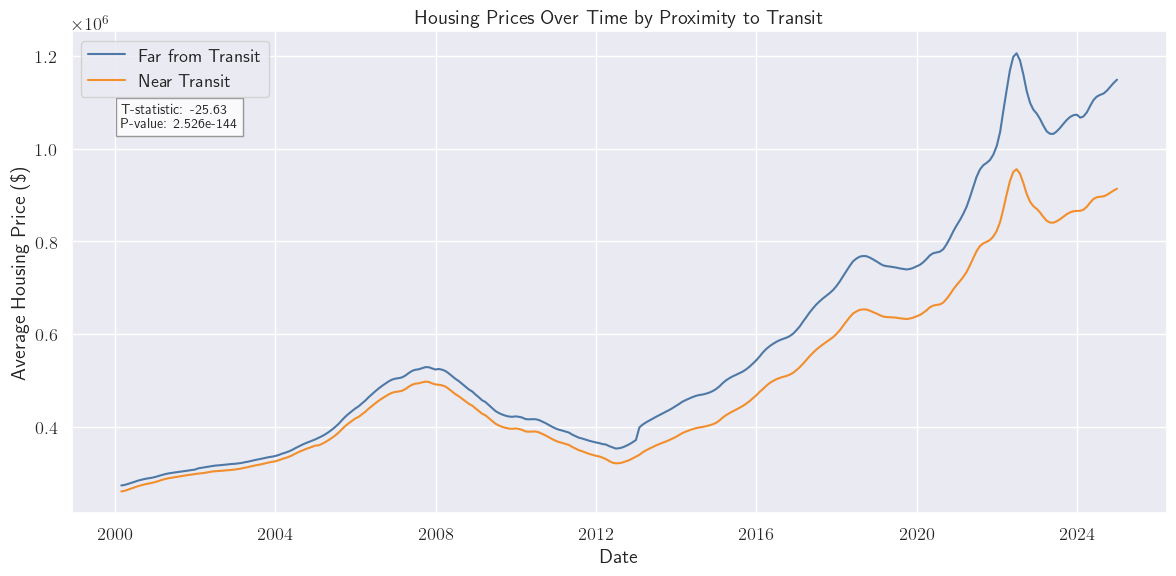

T-statistic: -25.630767545712377, P-value: 2.525524566205076e-144


In [36]:
# Step 1: Group Housing Data by Proximity to Transit
housing_geo["Proximity"] = housing_geo["Name"].isin(housing_near_transit["Name"])
housing_geo["Proximity"] = housing_geo["Proximity"].apply(lambda x: "Near Transit" if x else "Far from Transit")

# Step 2: Compute Average Housing Prices for Each Group
housing_prices = housing_geo.groupby(["Date", "Proximity"])["MedianPrice"].mean().reset_index()

# Step 3: Visualize Trends in Housing Prices
plt.figure(figsize=(12, 6))
for group, data in housing_prices.groupby("Proximity"):
    plt.plot(data["Date"], data["MedianPrice"], label=group)
plt.title("Housing Prices Over Time by Proximity to Transit")
plt.xlabel("Date")
plt.ylabel("Average Housing Price (\$)")
plt.legend()

# Step 4: Conduct a Statistical Test
near_transit = housing_geo[housing_geo["Proximity"] == "Near Transit"]["MedianPrice"]
far_from_transit = housing_geo[housing_geo["Proximity"] == "Far from Transit"]["MedianPrice"]
t_stat, p_value = ttest_ind(near_transit.dropna(), far_from_transit.dropna())

# Add T-statistic and P-value to the plot
text_x = housing_prices["Date"].quantile(0)
text_y = housing_prices["MedianPrice"].quantile(0.95)
plt.text(text_x, text_y, f"T-statistic: {t_stat:.2f}\nP-value: {p_value:.3e}", fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.show()

print(f"T-statistic: {t_stat}, P-value: {p_value}")
